In [32]:
from sklearn.neighbors import KNeighborsClassifier
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [33]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

In [34]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

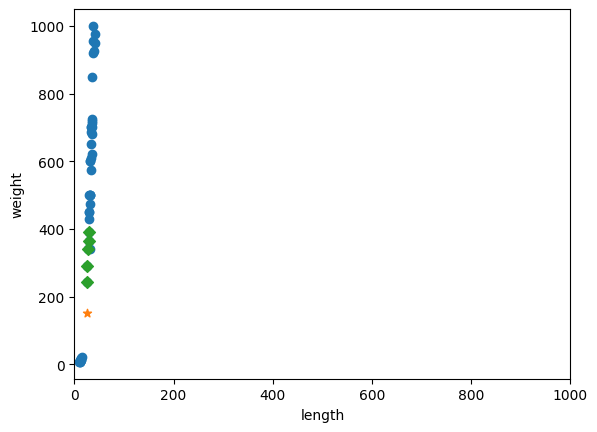

In [37]:
import matplotlib.pyplot as plt
plt.scatter(fish_data[:,0], fish_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(25, 150, marker="*")
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker="D")
plt.xlim((0, 1000))
plt.show()

In [38]:
#표준점수(standard score)
#표준점수 = (데이터 - 평균) / 표준편차
mean = np.mean(fish_data, axis=0)
std = np.std(fish_data, axis=0)

train_scaled = (fish_data - mean) / std

In [39]:
#학습
kn.fit(train_scaled, fish_target)

KNeighborsClassifier()

In [40]:
domi = [25, 150]
domi_scaled = (domi - mean) / std
prediction = kn.predict([domi_scaled])

In [41]:
if prediction[0] == 1:
        print("도미")

도미


Text(0, 0.5, 'weight')

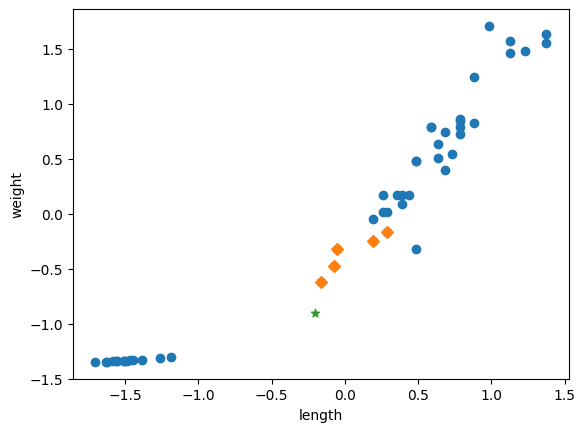

In [42]:
dist, indexes = kn.kneighbors([domi_scaled])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker="D")
plt.scatter(domi_scaled[0], domi_scaled[1], marker="*")
plt.xlabel('length')
plt.ylabel('weight')

In [43]:
dist, indexes = kn.kneighbors([domi_scaled])
print(dist, indexes)

[[0.28600552 0.44973353 0.60343696 0.76537512 0.88843968]] [[0 1 2 3 7]]


In [44]:
kn.score(train_scaled, fish_target)

1.0

In [47]:
# 모델 저장하기
kn = KNeighborsClassifier()
kn.fit(train_scaled, fish_target)
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(kn, f)

# 모덜 불러오기
with open("model.pkl", "rb") as f:
    fish_model = pickle.load(f)

fish_model.predict([[25, 150]])

array([1.])